#Brain Tumor MRI Classification
To Detect and Classify Brain Tumor using, CNN and TL; as an asset of Deep Learning and to examine the tumor position(segmentation).

# import libraries & load data

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
import ipywidgets as widgets
import io
from tqdm import tqdm
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


import tensorflow as tf
import cv2

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets/BrainTumorDetection/project2/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# data preparation

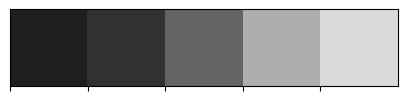

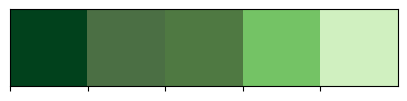

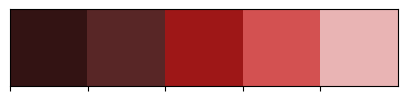

In [ ]:
# colors
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)


In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Datasets/BrainTumorDetection/project2/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Datasets/BrainTumorDetection/project2/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:34<00:00,  2.17it/s]


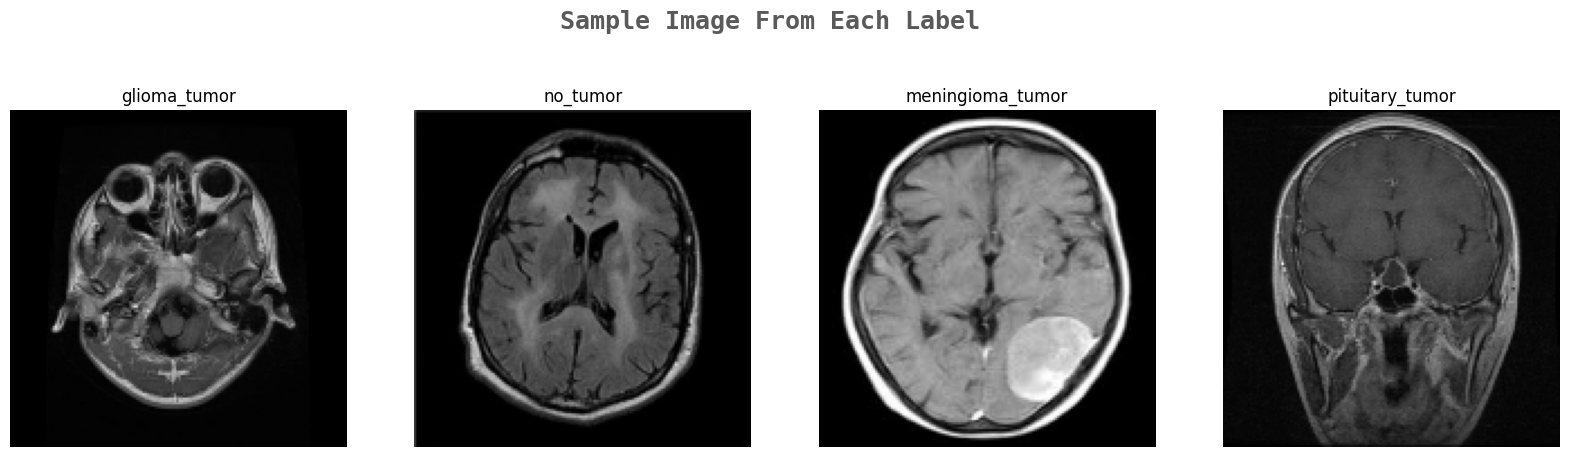

In [ ]:
# sample from each label
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape

(3264, 150, 150, 3)

# train-test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
# neural networks deal with numerical values: One-Hot encoding

y_train_new = [] #store values of y_train
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Models:


*  VGG16 (CNN)
*  EfficientNetB0 (Transfer Learning)
*  DenseNet201 (CNN)





## CNN Model: Sequential

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(256,(3,3), activation = 'relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
# # training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)


In [ ]:
# # save the model
# model.save('/content/drive/MyDrive/Datasets/BrainTumorDetection/project2/braintumor_sequentialmodel.h5')

In [ ]:
# plotting the accuracy

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# plotting the loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# classification report
print(classification_report(y_test_new,pred))

## Transfer Learning: EfficientNet

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

In this notebook, I'll be using the EfficientNetB0 model which will use the weights from the ImageNet dataset.

The include_top parameter is set to False so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

GlobalAveragePooling2D -> This layer acts similar to the Max Pooling layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while pooling. This really helps in decreasing the computational load on the machine while training.

Dropout -> This layer omits some of the neurons at each step from the layer making the neurons more independent from the neibouring neurons. It helps in avoiding overfitting. Neurons to be ommitted are selected at random. The rate parameter is the liklihood of a neuron activation being set to 0, thus dropping out the neuron

Dense -> This is the output layer which classifies the image into 1 of the 4 possible classes. It uses the softmax function which is a generalization of the sigmoid function

In [ ]:
effnet_model = effnet.output
effnet_model = tf.keras.layers.GlobalAveragePooling2D()(effnet_model)
effnet_model = tf.keras.layers.Dropout(rate=0.5)(effnet_model)
effnet_model = tf.keras.layers.Dense(4,activation='softmax')(effnet_model)
effnet_model = tf.keras.models.Model(inputs=effnet.input, outputs = effnet_model)

In [ ]:
effnet_model.summary()

In [ ]:
effnet_model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ["accuracy"])

Callbacks -> Callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.

By definition, "A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training."

In this notebook, I'll be using TensorBoard, ModelCheckpoint and ReduceLROnPlateau callback functions

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("braintumor_effnetmodel.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
# # training the model
# effnet_history = effnet_model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
#                    callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
# # saving the model
# effnet_model.save('/content/drive/MyDrive/Datasets/BrainTumorDetection/project2/braintumor_effnetmodel.h5')

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
effnet_train_acc = effnet_history.history['accuracy']
effnet_train_loss = effnet_history.history['loss']
effnet_val_acc = effnet_history.history['val_accuracy']
effnet_val_loss = effnet_history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)


# plotting the accuracy
sns.despine()
ax[0].plot(epochs, effnet_train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, effnet_val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')


# plotting the loss
sns.despine()
ax[1].plot(epochs, effnet_train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, effnet_val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
# classification report
print(classification_report(y_test_new, pred))

# resources

Source:

[Kaggle Dataset](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data)


Research and Resources:

* [MRI Playlist](https://www.youtube.com/playlist?list=PL5foUFuneQnratPPuucpVxWl4RlqueP1u)
* [Advanced DL](https://www.youtube.com/watch?v=-zmBMxpNDqQ&list=PLXCapw88C2b65E9ZlMx0dIQlgCZtvEsBF&index=7)
* [MRI Arch.](https://www.youtube.com/watch?v=fimm72Nwl7U&list=PLXCapw88C2b65E9ZlMx0dIQlgCZtvEsBF&index=17)
* [DL Project](https://www.youtube.com/watch?v=juJYmc4vrWU&t=121s)
* [ML Website](https://levelup.gitconnected.com/machine-learning-in-production-a036567e9c86)
